# Example - Barcelona Airbnb listings

### Introduction

**Airbnb** is a peer-to-peer online marketplace and homestay network, which enables people to list or rent short-term lodging in residential properties, with the cost of such accommodation set by the property owner. The company receives percentage service fees from both guests and hosts in conjunction with every booking. Starting in 2008, it has grown exponentially, and it currently has over 2 million listings in about 200 countries.

Airbnb currently releases and updates data at the Inside Airbnb site (`insideairbnb.com`). The update posted in July 2019 covers 101 areas, most of them in US and Europe. In this example, we use data from Barcelona, captured on April 14th, 2019. 

### The data set

The file `airbnb.csv` contains data on 18,302 Airbnb listings in Barcelona. The language in the descriptions is typically English or Spanish (with exceptions). The text comes in UTF-8 encoding, so special characters may not be correctly shown (in Spanish words such as "habitación") in Windows machines and Microsoft applications. 

The variables are:

* `listing_id`, a unique listing's ID. An active listing is a property listed on Airbnb. Listings may include entire homes or apartments, private rooms or shared spaces.

* `host_id`, a unique host's ID.

* `host_since`, the date of the host's first listing in Airbnb, as yyyy-mm-dd.

* `name`, the listing's name. A minimal description (maximum 35 characters) of the place, intended to be appealing, such as "Centric Bohemian next Ramblas\&Macba".

* `neighbourhood`, the neighbourhood of the listing. The neighbourhoods are sourced from city or open source GIS files.

* `property_type`, the type of property listed. Typically 'Appartment', 'Bed & Breakfast' or 'House', but it can also be 'Boat', 'Loft', or others.

* `room_type`, taking values 'Entire home/apt', 'Private room' and 'Shared room'.

* `bedrooms` the number of available bedrooms.

* `price`, the daily listing's price on that date in euros. The price shown is for the listing as a whole, not per person. The price that you see when you search Airbnb (with dates selected) is the total price divided by the number of nights you selected. When a listing has been booked for several days, the price can be lower, since the host can apply different prices depending on the number of days booked.

* `number_of_reviews`, the number of reviews of that listing that have been posted.

* `review_scores_rating`, the average reviewers' rating of overall experience (*what was your guest’s overall experience?*). Listings are rated in the range 1-100. 


Source: Inside Airbnb, edited.


### Importing the data

I import the data to a Pandas data frame, taking `listing_id` as the index.

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/mcanela-iese/DataScience/main/Data/airbnb.csv'
df = pd.read_csv(url, index_col=0)

The contents of this data frame are explored with the method `info`:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18302 entries, 18666 to 34686079
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_id               18302 non-null  int64  
 1   host_since            18295 non-null  object 
 2   name                  18286 non-null  object 
 3   neighbourhood         18302 non-null  object 
 4   property_type         18302 non-null  object 
 5   room_type             18302 non-null  object 
 6   bedrooms              18298 non-null  float64
 7   price                 18302 non-null  int64  
 8   number_of_reviews     18302 non-null  int64  
 9   review_scores_rating  14028 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.5+ MB


Some columns have **missing values**. In particular, we have a relevant number of listings with no rating scores (many guests don't rate the lodgings). A missingness report can be printed with:

In [4]:
df.isna().sum()

host_id                    0
host_since                 7
name                      16
neighbourhood              0
property_type              0
room_type                  0
bedrooms                   4
price                      0
number_of_reviews          0
review_scores_rating    4274
dtype: int64

Note that `df.isna()` is a data frame of the same shape as `df`, whose columns have type `bool`. With `sum`, we get the number of `True` values per column.

We can also display a few rows of this data set with `head`:

In [5]:
df.head()

,host_id,host_since,name,neighbourhood,property_type,room_type,bedrooms,price,number_of_reviews,review_scores_rating
listing_id,,,,,,,,,,
18666,71615,2010-01-19,Flat with Sunny Terrace,el Camp de l'Arpa del Clot,Apartment,Entire home/apt,2.0,130,1,80.0
18674,71615,2010-01-19,Huge flat for 8 people close to Sagrada Familia,la Sagrada Família,Apartment,Entire home/apt,3.0,60,10,84.0
23197,90417,2010-03-09,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,el Besòs i el Maresme,Apartment,Entire home/apt,3.0,200,38,94.0
25786,108310,2010-04-14,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,la Vila de Gràcia,Apartment,Private room,1.0,42,231,95.0
31377,134698,2010-05-29,"Room for 2, Sagrada Famili",el Baix Guinardó,Apartment,Private room,1.0,42,4,95.0


### Counting duplicates

**Duplicates** can be detected with the method `duplicated`, which creates a Boolean mask. For instance, the listing's ID in this data set is never duplicated, so it makes sense to use it as the index: 

In [6]:
df.index.duplicated().sum()

0

But a different thing is whether several listings have exactly the same data (eg when they refer to beds in a shared bedroom). How often this happens?

In [7]:
df.duplicated().sum()

36

How does `duplicated` work? It reads the data top-down, returning `False` for the entries that occur for the first time, and `True` for those that have already occurred before. This can be reversed. 

### How are the hosts?

The file contains some information about the hosts, that is, the people renting the lodgings. For instance, you may be interested in the old hosts. By using a Boolean mask like `df['host_since'] < '2010-01-01'` you can select the listings with the oldest hosts. Then, `value_counts` returns a lists with the number of listings of every host:

In [8]:
df['host_id'][df['host_since'] < '2010-01-01'].value_counts()

10704    67
34580     1
44384     1
3073      1
41161     1
45448     1
Name: host_id, dtype: int64

So, we have six hosts in this list. Five of them have one listing, but host 10704 looks like a company. You may wonder how frequent is this. It has been said that Airbnb was created to be a P2P network, meaning individuals renting their apartments to other individuals. But critics say that it has evolved into a platform where investors owning big real state portfolios can offer them. Is that the case in Barcelona? 

The ratio of the number of listings to the number of hosts can give us a reference. The list of unique host ID's can be extracted as the index of the series returned by `value_counts`. In this way, the hosts would come ordered by the number of listings. We can also get them, as an array, with the method `unique`:

In [9]:
df['host_id'].unique()

array([    71615,     90417,    108310, ..., 261621937,  24928327,
        10444921])

To count them:

In [10]:
df['host_id'].unique().shape

(8940,)

So, 8,940 hosts manage 18,302 property units. Most of them have a single property:

In [11]:
(df['host_id'].value_counts() == 1).sum()

6359

We can easily identify the hosts with the biggest portfolios:

In [12]:
df['host_id'].value_counts().head(10)

4459553      200
102947901    142
158023606    126
193618270    111
170716140    107
1391607       98
396363        97
36607755      82
299462        79
32037490      78
Name: host_id, dtype: int64

The proportion of hosts with more than 10 listings is:

In [13]:
(df['host_id'].value_counts() > 10).mean().round(3)

0.02

### Distribution of price

How is the distribution of the listing's price? We can explore this point with a histogram. The histogram is returned by the Pandas method `plot.hist`, which has already been used in a previous example.

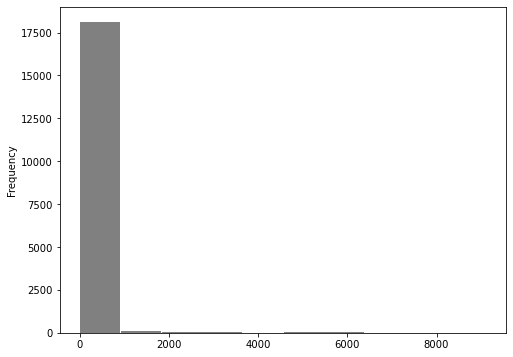

In [14]:
df['price'].plot.hist(figsize=(8,6), color='gray', rwidth=0.98);

This is not really useful, since some very expensive listings distort the whole picture. But we can trim the data, by dropping the most expensive listings, to get a better picture. A statistical summary, as the one returned by `describe`, can be helpful:

In [15]:
df['price'].describe()

count    18302.000000
mean       124.092831
std        383.541316
min          7.000000
25%         39.000000
50%         62.000000
75%        110.000000
max       9120.000000
Name: price, dtype: float64

25 and 150 euros look like reasonable limits for trimming:

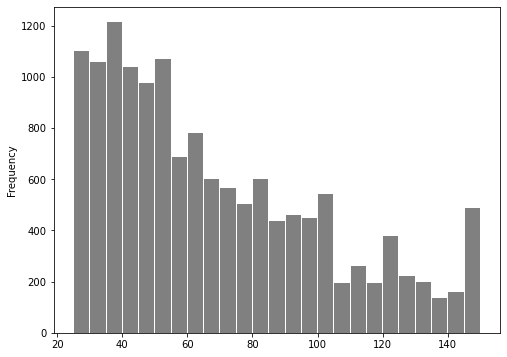

In [16]:
df['price'][(df['price'] >= 25) & (df['price'] <= 150)].plot.hist(figsize=(8,6), 
  color='gray', rwidth=0.94, bins=25);

The argument `bins=25` specifies that the range covered by the data is partitioned into 25 intervals. This, together with the limits used for trimming the data, yields intervals of length 5 euros, which makes the picture easy to read. Except for 40 euros, the intervals starting at multiples of 10 have higher bars. This is not rare. Prices don't change continuously, and hosts prefer prices which are multiples of 10. The histogram also shows that 50, 100 and 150 euros are popular prices.

*Note*. The rule for counting the observations in every bin is as follows. For an interval of limits `a` and `b`, the values `x` such that `a <= x < b` are counted. Except for the last interval, where the right limit is also included.

### Average price per room type

Suppose that you are interested in the average price per room type. You can get this by applying `groupby`. This method groups the rows according to one or more **grouping features**. Here, you specify `groupby(by='room_type')`. Next, you select the columns to be aggregated, which, here would be just `price`. Finally, you specify the **aggregation function**. Having only the mean, you can do it just by adding `.mean()`.

In [17]:
df.groupby(by='room_type')['price'].mean().round(1)

room_type
Entire home/apt    169.3
Private room        79.9
Shared room        139.5
Name: price, dtype: float64

The differences across room types are clear and not hard to understand. But, how informative is the average price? We know that, with skewed distributions, the extreme observations on the right tail "pull" the mean, which can be then fall far from the middle of the distribution. In these cases, the median gives a better description of the mid prices. To get the median price per room type, just replace the aggregation function `mean` by `median`. 

In [19]:
df.groupby(by='room_type')['price'].median()

room_type
Entire home/apt    100.0
Private room        40.0
Shared room         30.0
Name: price, dtype: float64

These results make more sense than the preceding ones, where shared rooms appeared as more expensive than private rooms. Not only the mean was giving a biased perspective of the mid prices, but this effect was much stronger for the shared rooms. 

### Top-10 neighbourhoods

To close this analysis of the Barcelona Airbnb data, we take a look at the neighbourhoods with more listings. The top-10 list can be extracted with `value_counts`:

In [20]:
df['neighbourhood'].value_counts().head(10)

la Dreta de l'Eixample                   2026
el Raval                                 1498
el Barri Gòtic                           1184
l'Antiga Esquerra de l'Eixample          1044
Sant Pere, Santa Caterina i la Ribera    1030
la Vila de Gràcia                        1018
la Sagrada Família                       1009
el Poble Sec                             1006
Sant Antoni                               904
la Nova Esquerra de l'Eixample            780
Name: neighbourhood, dtype: int64

Are these neighbourhoods more expensive? We wonder if there is an association between the mid price and the amount of property listed. To get the answer, we can extract a **pivot table** with the neighbourhood in the rows and the number of listings and the mid price in the columns. We apply `groupby` as above, but using here the method `agg`, which allows for multiple aggregation. The function `count`, added in this new calculation, counts the non missing observations.

Except for la Dreta de l'Eixample, we don't find a higher price associated to a higher number of listings. So, the picture is more complex than that.

In [21]:
df.groupby(by='neighbourhood')['price'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)

,count,median
neighbourhood,,
la Dreta de l'Eixample,2026,120.0
el Raval,1498,51.0
el Barri Gòtic,1184,62.0
l'Antiga Esquerra de l'Eixample,1044,80.0
"Sant Pere, Santa Caterina i la Ribera",1030,60.0
la Vila de Gràcia,1018,76.0
la Sagrada Família,1009,80.0
el Poble Sec,1006,62.0
Sant Antoni,904,70.0
